In [2]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# read the dataset using pandas
data = pd.read_csv('Salary_Data.csv')

In [4]:
# This displays the top 5 rows of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
# this describes the basic stat behind the dataset used 
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


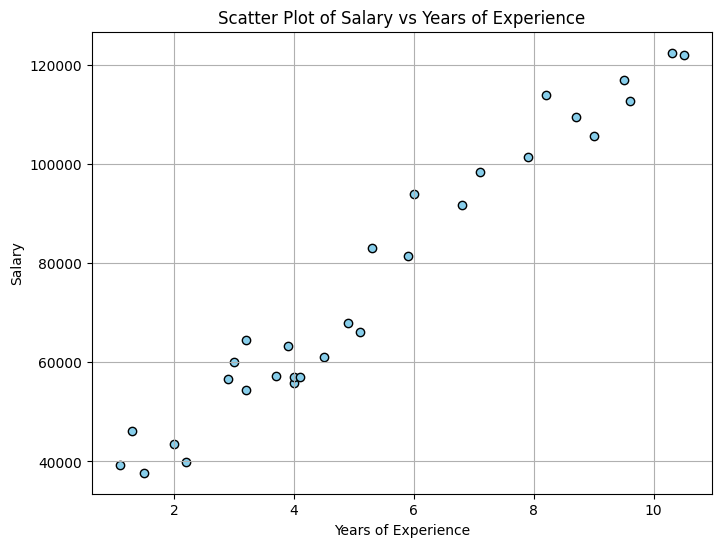

In [13]:
# These Plots help to explain the values and how they are scattered

# Plot a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['YearsExperience'], data['Salary'], color='skyblue', edgecolor='black')
plt.title('Scatter Plot of Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()
 

In [8]:
# Cooking the data
X = data['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [9]:
# Cooking the data
y = data['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [15]:
# Split the data for train and test (70% for training)
from sklearn.model_selection import train_test_split
X = data[['YearsExperience']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((21, 1), (9, 1), (21,), (9,))

In [18]:
# Create new axis for x column
X_train_np = X_train.values[:, np.newaxis]
X_test_np = X_test.values[:, np.newaxis]

In [19]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_


(array([9339.08172382]), np.float64(25918.438334893202))

In [ ]:
# Fitting the model
model.fit(X_train, y_train)

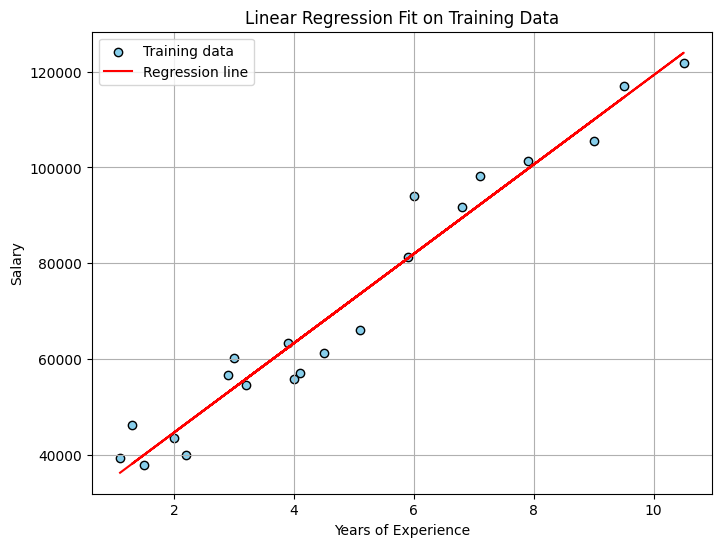

In [21]:
# Plotting the regression line with the training data (not included in the assignment)
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='skyblue', label='Training data', edgecolor='black' )
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')
plt.title('Linear Regression Fit on Training Data')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Predicting the Salary for the Test values
y_pred = model.predict(X_test)
predicted_vs_actual = pd.DataFrame({
    'YearsExperience': X_test.values.flatten(),
    'Actual Salary': y_test.values,
    'Predicted Salary': y_pred
})
predicted_vs_actual.sort_values(by='YearsExperience').reset_index(drop=True)



,YearsExperience,Actual Salary,Predicted Salary
0,3.2,64445.0,55803.499851
1,3.7,57189.0,60473.040713
2,4.0,56957.0,63274.765230
3,4.9,67938.0,71679.938782
4,5.3,83088.0,75415.571471
5,8.2,113812.0,102498.908470
6,8.7,109431.0,107168.449332
7,9.6,112635.0,115573.622884
8,10.3,122391.0,122110.980090


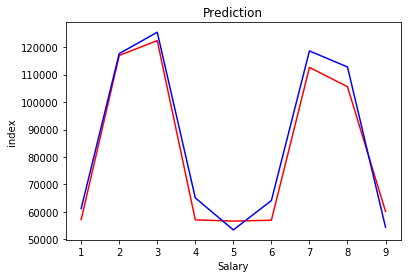

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

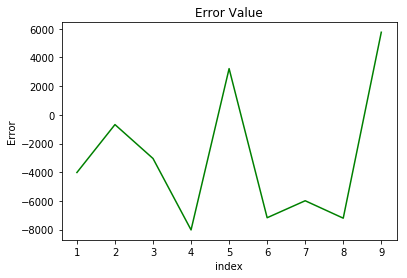

In [ ]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [25]:
# Importing r2_score and mean_squared_error for the evaluation of the model
from sklearn.metrics import r2_score, mean_squared_error

In [26]:
# calculate Mean square error
mse = mean_squared_error(y_test, y_pred)
mse

37784662.46621314

In [27]:
# Calculate R square vale
r2 = r2_score(y_test, y_pred)
r2

0.9414466227178214

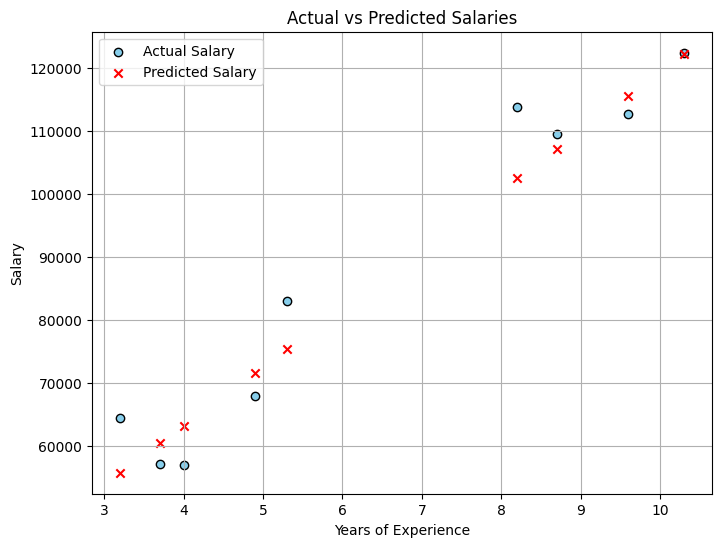

In [29]:
# Just plot actual and predicted values for more insights
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='skyblue', label='Actual Salary' , edgecolor='black' )
plt.scatter(X_test, y_pred, color='red', label='Predicted Salary', marker='x')
plt.title('Actual vs Predicted Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
# Intecept and coeff of the line
print('Intercept of the model:',model.intercept_)
print('Coefficient of the line:',model.coef_)

Intercept of the model: 25918.438334893202
Coefficient of the line: [9339.08172382]


![](http://)Then it is said to form a line with
# y = 25202.8 + 9731.2x